# Dataset
The dataset is called "Go to college" and it contains 1000 entries, 11 features per entry and each row contains info about students in school such as gender, interest, parent's age and salary, grades average etc. The dataset can be found on <a href="https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset">Kaggle</a>.

The goal of this project is to explore the dataset, visualize the correlations between different characteristics of students and to predict the average of their grades based on available features.

In [209]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy.interpolate import interp1d

First thing we do is to load the dataset and display the first ten entries in order to have an ideea of how the data looks like.

In [210]:
#loading the dataset
df = pd.read_csv("data.csv")
df.head(10)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
5,Vocational,B,Female,Less Interested,Rural,48,3770000,65.3,86.79,True,False
6,Academic,A,Male,Very Interested,Rural,52,6680000,85.5,90.39,True,True
7,Academic,B,Male,Very Interested,Rural,53,5890000,83.3,84.65,True,False
8,Academic,B,Female,Uncertain,Rural,52,6730000,80.3,88.50,True,True
9,Academic,B,Female,Very Interested,Rural,47,3880000,68.0,85.43,True,False


As seen above, the salaries are probably missing the comma and the last two digits have merged with the number. We will solve this by dividing each salary by 100.

In [211]:
The goal of this project is to explore the dataset, visualize the correlations between different characteristics of students and to predict the average of their grades based on available features.#small adjustment in parents salary
df['parent_salary']=df['parent_salary']/100

# EDA and Data Visualization

First off we explore the interest of the students vased on the type of school they attend to. The distribution seems to be pretty similar. The students that follow the academic path tend to have slightly more interest than the ones attending a vocational type of school.

In [212]:
x=df['interest'].value_counts(normalize=True)
men_row=df[df['type_school'] == 'Academic']['interest'].value_counts(normalize=True)
female_row=df[df['type_school'] == 'Vocational']['interest'].value_counts(normalize=True)
columns=[]
row_academic=[]
row_vocational=[]
for i in x.keys():
    columns.append(i)
for i in men_row:
    row_academic.append(round(i, 2))
for i in female_row:
    row_vocational.append(round(i, 2))

dataff=pd.DataFrame(list(zip(row_academic,row_vocational))).T
dataff.columns=columns
dataff['type_school']=['Academic','Vocational']

fig = px.bar(dataff, x="type_school", y=columns, text_auto=True, 
             title="Interest distribution based on school type")
fig.show()

In the figure below, we can see the distribution of students residence type based on the age of the parents. The students from the urban area usually have older parents, compared to the ones from rural area.

In [229]:
residence_urban =  df[df['residence'] == 'Urban']['parent_age']
residence_rural =  df[df['residence'] == 'Rural']['parent_age']

fig = ff.create_distplot([residence_urban,residence_rural],
                         ['Urban','Rural'], 
                         show_hist=False, 
                         colors=['blue','red'])
fig.update_layout(title_text='Distribution of residence based on parent age')
fig.show()

For a better understanding of the impact of college in a person's income, we also explored this relationship (as seen in the figure below) and as expected, the parents with a diploma tend to have a higher income.

In [230]:
parent_college =  df[df['parent_was_in_college'] == True]['parent_salary']
parent_wo_college =  df[df['parent_was_in_college'] == False]['parent_salary']

fig = ff.create_distplot([parent_college,parent_wo_college],
                         ['With college','Without college'], 
                         show_hist=False, 
                         colors=['blue','red'])
fig.update_layout(title_text='Distribution of parent salaries based on their education')
fig.show()

Talking about the distribution of the grades based on the gender of the student, surprisingly males are getting slightly better results.

In [215]:
males_df =  df[df['gender'] == 'Male']['average_grades']
females_df =  df[df['gender'] == 'Female']['average_grades']



fig = ff.create_distplot([males_df,females_df],
                         ['Males','Females'], 
                         show_hist=False, 
                         colors=['blue','green'])
fig.update_layout(title_text='Distribution of grades based on gender')
fig.show()

As for the relationship between students grades and the type of school they attend to, there is no doubt that students following the academic path have higher grades.

In [216]:
academic =  df[df['type_school'] == 'Academic']['average_grades']
voc =  df[df['type_school'] == 'Vocational']['average_grades']

fig = ff.create_distplot([academic,voc],
                         ['Academic','Vocational'], 
                         show_hist=False, 
                         colors=['black','magenta'])
fig.update_layout(title_text='Distribution of grades based on school type')
fig.show()

Speaking about interest, most of the students (32.4%) are very interested in attending a college and overall females are showing more interest than males.

In [217]:
fig = px.pie(df, names='interest', title="Interest distribution")
fig.show()

In [218]:
male_df = df[df['gender'] == 'Male']

fig = px.pie(male_df, names='interest', title="Interest distribution of Males")
fig.show()

In [219]:
female_df = df[df['gender'] == 'Female']

fig = px.pie(female_df, names='interest', title="Interest distribution of Females")
fig.show()

Given the fact that money plays an important role in everyones life, we also explored the relationship between students grades and their parents income, and as seen in the figure below, the students with parents that earn more money tend to have slightly higher grades on average.

In [220]:
df_tmp=df.sort_values(by=['parent_salary'])

fig = px.line(df_tmp, y="average_grades", x="parent_salary",
              title="Relationship between students grades and salary of their parents")
fig.show()

In [221]:
#Drop in college column due to irrelevance
df=df.drop(columns=['in_college'])

To prepare the dataset for the learning process, we encoded categorical values and normalized the values of numerical values.

In [228]:
#encode categorical data and normalize numerical values
labelencoder = LabelEncoder()
df_copy=copy.deepcopy(df)
df_copy['type_school']=labelencoder.fit_transform(df['type_school'])
df_copy['school_accreditation']=labelencoder.fit_transform(df['school_accreditation'])
df_copy['gender']=labelencoder.fit_transform(df['gender'])
df_copy['interest']=labelencoder.fit_transform(df['interest'])
df_copy['residence']=labelencoder.fit_transform(df['residence'])
df_copy['parent_was_in_college']=labelencoder.fit_transform(df['parent_was_in_college'])

m = interp1d([df_copy['parent_salary'].min(),df_copy['parent_salary'].max()],[0,1])
df_copy['parent_salary']=m(df_copy['parent_salary'])
m = interp1d([df_copy['house_area'].min(),df_copy['house_area'].max()],[0,1])
df_copy['house_area']=m(df_copy['house_area'])
m = interp1d([df_copy['parent_age'].min(),df_copy['parent_age'].max()],[0,1])
df_copy['parent_age']=m(df_copy['parent_age'])
df_copy

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college
0,0,0,1,0,1,0.64,0.661111,0.630,84.09,0
1,0,0,1,0,1,0.68,0.378889,0.568,86.91,0
2,0,1,0,4,1,0.40,0.611111,0.606,87.43,0
3,1,1,1,4,0,0.36,0.622222,0.582,82.12,1
4,0,0,0,4,1,0.68,0.472222,0.551,86.79,0
...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,4,0,0.36,0.713333,0.436,85.99,1
996,0,1,0,0,0,0.44,0.720000,0.643,89.72,1
997,1,0,1,0,1,0.36,0.505556,0.552,79.56,0
998,0,1,1,3,0,0.52,0.537778,0.858,87.18,1


The dataset containing now only numerical values, we created the correlation matrix and we've seen interesting relationships such as:
<li>Parent was in college and school accreditation</li>
<li>House area and average grades</li>
and also relationships we've discovered earlier such as:
<li>Average grades and parent salary</li>
<li>Parent age and residence</li>

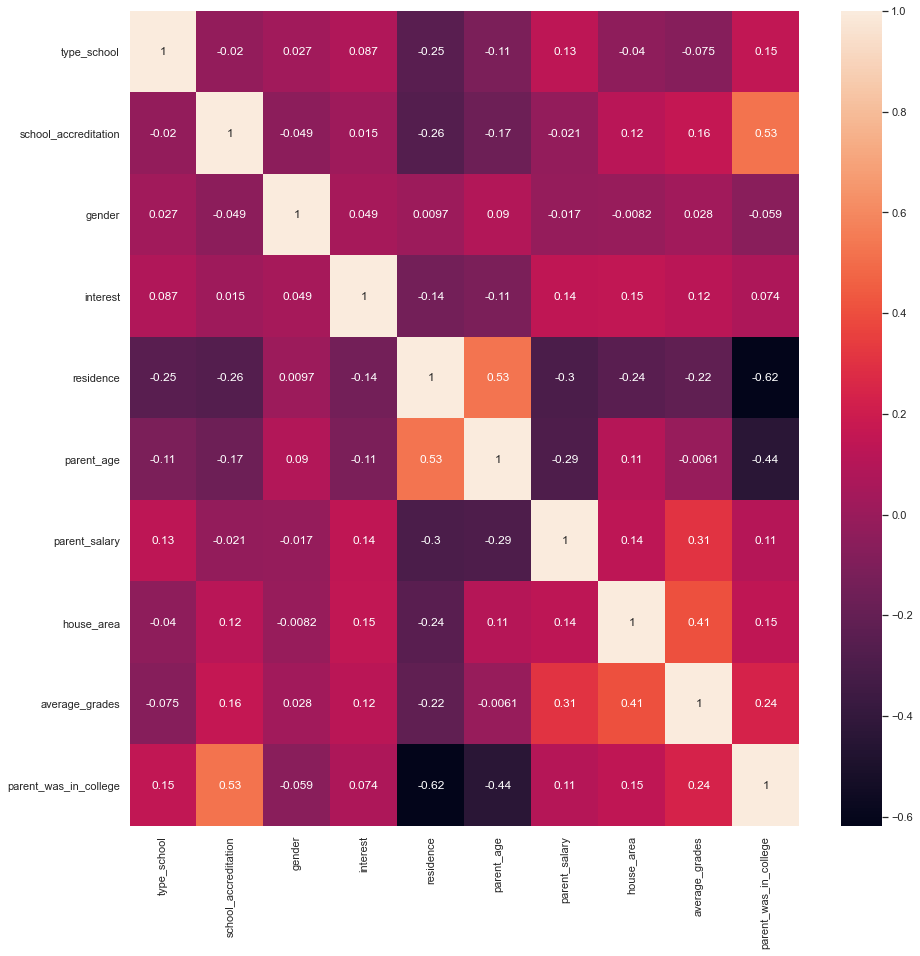

In [223]:
#creating the correlation matrix heatmap
corr = df_copy.corr()
sb.set(rc = {'figure.figsize':(15,15)})
sb.heatmap(corr, annot=True)


# Prediction

In this step we separate the data in features and labels and given the fact that we want to make a prediction on students grades, we remove the column from the dataframe and store it in a list (y).
Next up, we split the data into two subsets  (training/validation) in a proportion of 85% for training and 15% for validation. We also feed the training data to the Random Forest Regressor.

In [224]:
# split the dataframe into features and labels
y=df_copy['average_grades']
df_copy=df_copy.drop(columns=['average_grades'])


In [225]:
#split the dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, test_size=0.15, random_state=15)

In [226]:
#instantiate the regressor
rfr = RandomForestRegressor(max_depth=36,n_estimators=600,verbose=0);

#train and predict
rfr.fit(X_train, y_train);
result = rfr.predict(X_test)

#results
print('Mean absolute error: ', mean_absolute_error(y_test, result))

Mean absolute error:  2.1877090000000052


We considered mean absolute error to measure the performance of the model we just created. Considering that most of students grades range from 80 to aprox. 92, we can say that the mean absolute error of our model's predictions represents a promising result(2.18).
Furthermore, for a better understanding of the relationship between features and the label (in our case the average of grades) we plotted below the importance of each feature considered by our model. Surprisingly, the most important feature in determining the grades of a student seems to be the area of his house, parents income and the age of parent.

In [227]:
# feature importance histogram
fig = px.histogram( rfr.feature_importances_,df_copy.columns,
                   y = rfr.feature_importances_.round(decimals =2),
                   title="The importance of each feature for prediction",histnorm='',
                   labels={
                     "y": "feature importance",
                     "x": "Feature"
                 })

fig.show()